In [1]:
import pandas as pd

In [2]:
board_games = pd.read_csv("board_games.csv")

In [11]:
board_games.head()
#len(board_games.columns)
#print board_games.count
#81312 rows x 20 columns

<bound method DataFrame.count of            id                type  \
0       12333           boardgame   
1      120677           boardgame   
2      102794           boardgame   
3       25613           boardgame   
4        3076           boardgame   
5       31260           boardgame   
6      124742           boardgame   
7       96848           boardgame   
8       84876           boardgame   
9       72125           boardgame   
10       2651           boardgame   
11     164153           boardgame   
12     115746           boardgame   
13     121921           boardgame   
14      35677           boardgame   
15      28720           boardgame   
16     126163           boardgame   
17     150376           boardgame   
18      68448           boardgame   
19      18602           boardgame   
20     122515           boardgame   
21      40834           boardgame   
22      62219           boardgame   
23      28143           boardgame   
24     103885           boardgame   
25   

In [12]:
#to remove any rows that contain missing values, and also remove any rows
#where users_rated equals 0. This will remove any rows that have no reviews. 
board_games = board_games.dropna(axis=0)

In [13]:
print board_games.count
#81268 rows x 20 columns

<bound method DataFrame.count of            id                type  \
0       12333           boardgame   
1      120677           boardgame   
2      102794           boardgame   
3       25613           boardgame   
4        3076           boardgame   
5       31260           boardgame   
6      124742           boardgame   
7       96848           boardgame   
8       84876           boardgame   
9       72125           boardgame   
10       2651           boardgame   
11     164153           boardgame   
12     115746           boardgame   
13     121921           boardgame   
14      35677           boardgame   
15      28720           boardgame   
16     126163           boardgame   
17     150376           boardgame   
18      68448           boardgame   
19      18602           boardgame   
20     122515           boardgame   
21      40834           boardgame   
22      62219           boardgame   
23      28143           boardgame   
24     103885           boardgame   
25   

In [14]:
print board_games["users_rated"]

0        20113
1        14383
2         9262
3        13294
4        39883
5        39714
6        15281
7        12697
8        15461
9        15709
10       34422
11        3980
12        3870
13       10539
14       15774
15        8785
16       12143
17        9188
18       36732
19       19160
20        6753
21       19261
22       10187
23       28655
24       11194
25       15853
26        8388
27       19864
28       20833
29       12064
         ...  
81282        0
81283        0
81284        0
81285        0
81286        0
81287        0
81288        0
81289        0
81290        0
81291        0
81292        0
81293        0
81294        0
81295        0
81296        0
81297        0
81298        0
81299        0
81300        0
81301        0
81302        0
81303        0
81304        0
81305        0
81306        0
81307        0
81308        0
81309        0
81310        0
81311        0
Name: users_rated, dtype: int64


In [19]:
board_games = board_games[board_games["users_rated"] > 0] #!=

In [20]:
board_games["users_rated"]

0        20113
1        14383
2         9262
3        13294
4        39883
5        39714
6        15281
7        12697
8        15461
9        15709
10       34422
11        3980
12        3870
13       10539
14       15774
15        8785
16       12143
17        9188
18       36732
19       19160
20        6753
21       19261
22       10187
23       28655
24       11194
25       15853
26        8388
27       19864
28       20833
29       12064
         ...  
81134        1
81160        1
81162        1
81176        5
81177        5
81178        5
81179        6
81180        6
81181        5
81184        1
81188        1
81190        1
81192        1
81193        1
81195        1
81198        1
81199        3
81204        1
81234        1
81249        1
81254        1
81255        2
81256        1
81257        1
81258        1
81260        1
81261        1
81263        1
81278        1
81279        1
Name: users_rated, dtype: int64

We want to predict the average rating model.
Next few steps to: explore data to understand the distribution of 
average_rating; to select an error metric that 
will be used to evaluate the performance of the model.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

(array([   602.,   1231.,   2824.,   5206.,   8223.,  13593.,  13849.,
          8470.,   2224.,    672.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

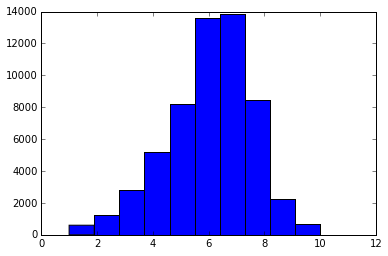

In [27]:
%matplotlib inline
plt.hist(board_games["average_rating"])

In [30]:
#Finding standard deviation and mean of this column.
print(board_games["average_rating"].std())

1.57882993483


In [31]:
print(board_games["average_rating"].mean())

6.01611284933


In [33]:
#Think about error metric.

Data is continuous. MSE is a good choice since it will help us focus on the effects the large errors more.

In [34]:
#Need to look for patterns in the dataset to chose a model. 
#Clustering, plots.

In [35]:
from sklearn.cluster import KMeans
#Initializing the KMeans class with 5 clusters.
kmeans_model = KMeans(n_clusters=5, random_state=1)

In [85]:
numeric_columns = board_games._get_numeric_data()

In [86]:
list_numeric = list(numeric_columns.columns)
#also removing id, as not very significant
list_numeric.remove("id")
numeric_columns = board_games[list_numeric]
numeric_columns

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005,2,2,180,180,180,13,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012,2,5,150,60,150,12,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013,1,7,210,30,210,12,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006,2,4,240,240,240,12,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002,2,5,150,90,150,12,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
5,2007,1,5,150,30,150,12,39714,8.11957,8.03847,47522,837,958,6402,9310,5065,3.6160
6,2012,2,2,45,45,45,14,15281,8.16760,7.97822,24381,680,627,3244,3202,1260,3.3103
7,2011,1,4,150,150,150,14,12697,8.15901,7.96929,18769,367,1116,5427,2861,1409,4.1292
8,2011,2,4,90,30,90,12,15461,8.07879,7.95011,20558,215,929,3681,3244,1176,3.0442
9,2011,2,6,200,60,200,14,15709,8.07933,7.93244,17611,273,1108,5581,3188,1486,3.6359


In [87]:
#Fitting the KMeans class to numeric columns.
kmeans_model.fit(numeric_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [88]:
labels = kmeans_model.labels_

In [89]:
#apply method on numeric_columns to find the mean and std of each row.
game_mean = numeric_columns.apply(np.mean,axis=1)
game_std = numeric_columns.apply(np.std,axis=1)
#What we get is the mean/std for each row

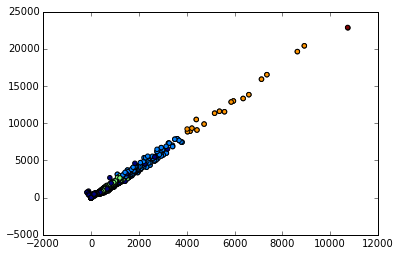

In [90]:
#Scatter plot
plt.scatter(x = game_mean, y = game_std, c=labels)

In [91]:
#Finding correlations between columns.
correlations = numeric_columns.corr()

In [92]:
correlations

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
yearpublished,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081
bayes_average_rating,0.140998,0.034915,-0.003437,0.045341,0.041845,0.045341,0.266937,0.317992,0.231563,1.000000,0.371017,0.455021,0.426708,0.377213,0.371031,0.313302,0.482356


In [93]:
#This will show how much each column in numeric_columns is correlated with
#average_rating.
correlations["average_rating"]

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

yearpublished(more recent, more popular), average_weight, bayes_average_rating, minage(older players, rated higher) have very high correlations value with average_rating. But we need to remove bayes_average_rating since it is derived from average_rating (otherwise it will cause overfitting).

In [94]:
temp = list(numeric_columns.columns)
temp.remove("bayes_average_rating")
temp.remove("average_rating")
numeric_columns = numeric_columns[temp]
#As of now, numeric_columns have all the numeric columns, except avg and bayes avg.

In [104]:
list(numeric_columns.columns)

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [105]:
list(board_games[temp].columns)

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [97]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression

# Initialize the linear regression class.
reg = LinearRegression()

In [101]:
reg.fit(board_games[temp], board_games["average_rating"]) #(predictors, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
#making predictions using the columns of board_games that could be used as 
#predictors. I am using the temp list as columns.
predictions = reg.predict(board_games[temp])

In [108]:
MSE = np.mean((predictions - board_games["average_rating"]) ** 2)
MSE

2.093396975833944

MSE very similar to std of all board game ratings. Model not very good.